In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

%matplotlib inline

In [2]:
# Read csv file as DataFrame, with the first column as row index
df_columbus = pd.read_csv("data/columbus.csv")
df_cincinatti = pd.read_csv("data/cincinnati.csv")
df_cleveland = pd.read_csv("data/cleveland.csv")
# Preview the dataset
df_columbus.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.70,2400.0,26.94,23.65,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
1,315536400,1980-01-01 01:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.57,NaN,26.82,24.13,...,NaN,NaN,NaN,NaN,NaN,78,803,Clouds,broken clouds,04n
2,315540000,1980-01-01 02:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.89,NaN,27.63,24.84,...,NaN,NaN,NaN,NaN,NaN,44,802,Clouds,scattered clouds,03n
3,315543600,1980-01-01 03:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.12,3200.0,27.32,22.96,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
4,315547200,1980-01-01 04:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.84,NaN,27.81,25.50,...,NaN,NaN,NaN,NaN,NaN,68,803,Clouds,broken clouds,04n


In [3]:
# function to convert unix timestamp to EST
def convert_to_est(timestamp):
    # Convert timestamp to datetime in UTC
    dt_utc = datetime.utcfromtimestamp(timestamp)
    
    # Specify the UTC timezone
    utc_timezone = pytz.timezone('UTC')
    
    # Localize the UTC datetime
    dt_utc = utc_timezone.localize(dt_utc)
    
    # Convert UTC datetime to Eastern Standard Time (EST)
    eastern_timezone = pytz.timezone('America/New_York')
    dt_est = dt_utc.astimezone(eastern_timezone)
    
    return dt_est

#create a column for EST
df_columbus['dt_est'] = df_columbus['dt'].apply(convert_to_est)
df_cincinatti['dt_est'] = df_cincinatti['dt'].apply(convert_to_est)
df_cleveland['dt_est'] = df_cleveland['dt'].apply(convert_to_est)


In [4]:
#set the index to EST
df_columbus.set_index('dt_est',inplace=True)
df_cincinatti.set_index('dt_est',inplace=True)
df_cleveland.set_index('dt_est',inplace=True)


In [5]:
# view data head
df_columbus.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_est,,,,,,,,,,,,,,,,,,,,,
1979-12-31 19:00:00-05:00,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.70,2400.0,26.94,23.65,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
1979-12-31 20:00:00-05:00,315536400,1980-01-01 01:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.57,NaN,26.82,24.13,...,NaN,NaN,NaN,NaN,NaN,78,803,Clouds,broken clouds,04n
1979-12-31 21:00:00-05:00,315540000,1980-01-01 02:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.89,NaN,27.63,24.84,...,NaN,NaN,NaN,NaN,NaN,44,802,Clouds,scattered clouds,03n
1979-12-31 22:00:00-05:00,315543600,1980-01-01 03:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.12,3200.0,27.32,22.96,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
1979-12-31 23:00:00-05:00,315547200,1980-01-01 04:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.84,NaN,27.81,25.50,...,NaN,NaN,NaN,NaN,NaN,68,803,Clouds,broken clouds,04n


In [6]:
# look at dataframe info
df_columbus.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 416153 entries, 1979-12-31 19:00:00-05:00 to 2024-01-01 18:00:00-05:00
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   416153 non-null  int64  
 1   dt_iso               416153 non-null  object 
 2   timezone             416153 non-null  int64  
 3   city_name            416153 non-null  object 
 4   lat                  416153 non-null  float64
 5   lon                  416153 non-null  float64
 6   temp                 416153 non-null  float64
 7   visibility           322179 non-null  float64
 8   dew_point            416153 non-null  float64
 9   feels_like           416153 non-null  float64
 10  temp_min             416153 non-null  float64
 11  temp_max             416153 non-null  float64
 12  pressure             416153 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0

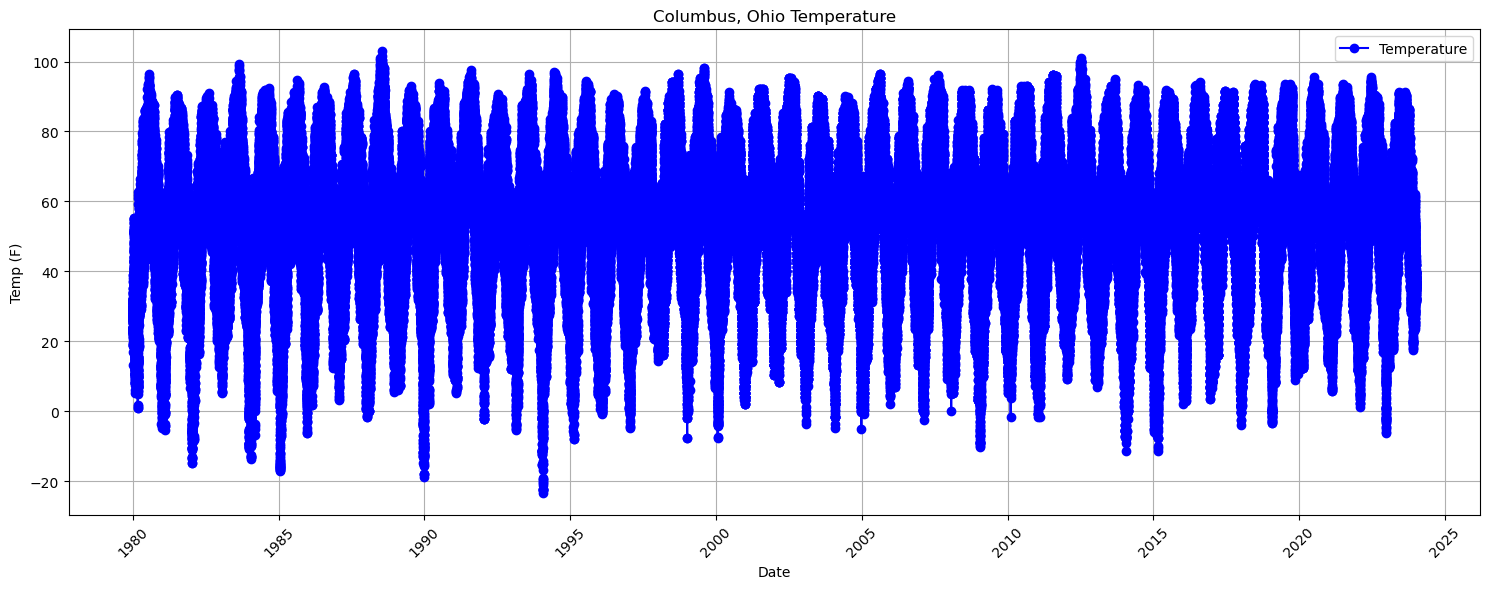

In [7]:
# plot the hourly temperature data in Columbus
plt.figure(figsize=(15, 6))
plt.plot(df_columbus['temp'], marker='o', linestyle='-', color='b', label='Temperature')
plt.title('Columbus, Ohio Temperature')
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

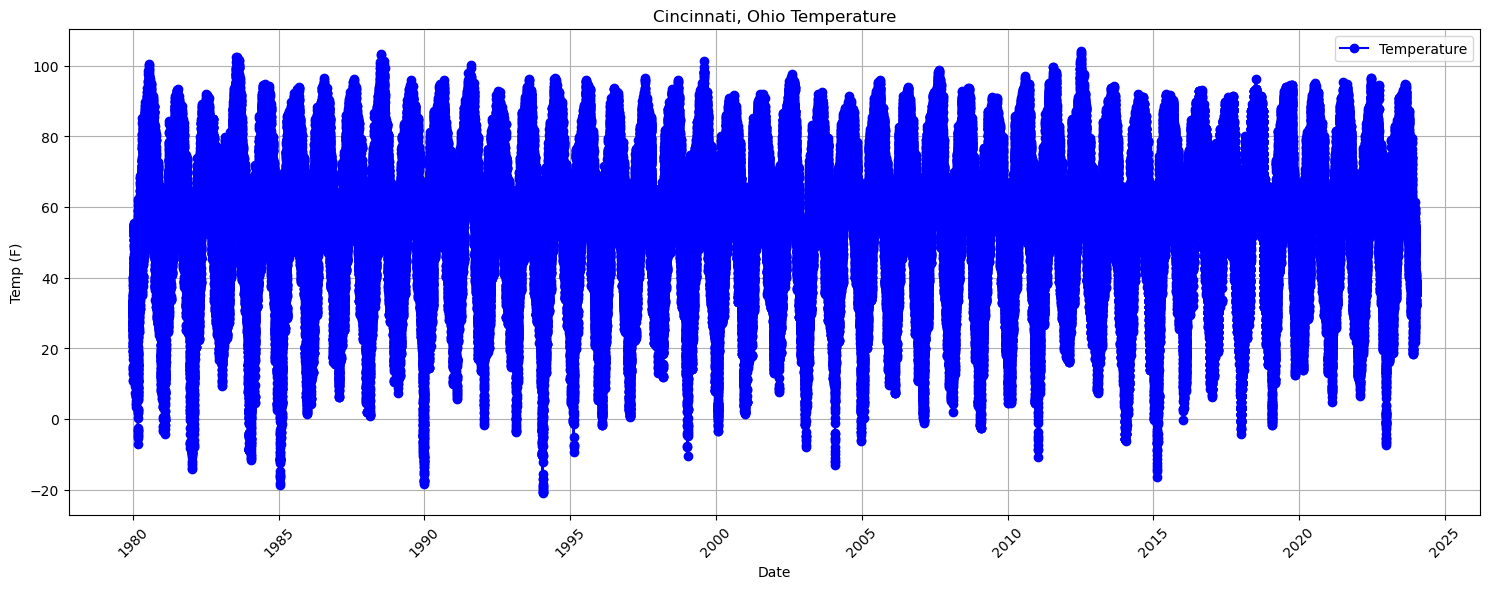

In [8]:
# plot the hourly temperature data in Cincinnati
plt.figure(figsize=(15, 6))
plt.plot(df_cincinatti['temp'], marker='o', linestyle='-', color='b', label='Temperature')
plt.title('Cincinnati, Ohio Temperature')
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

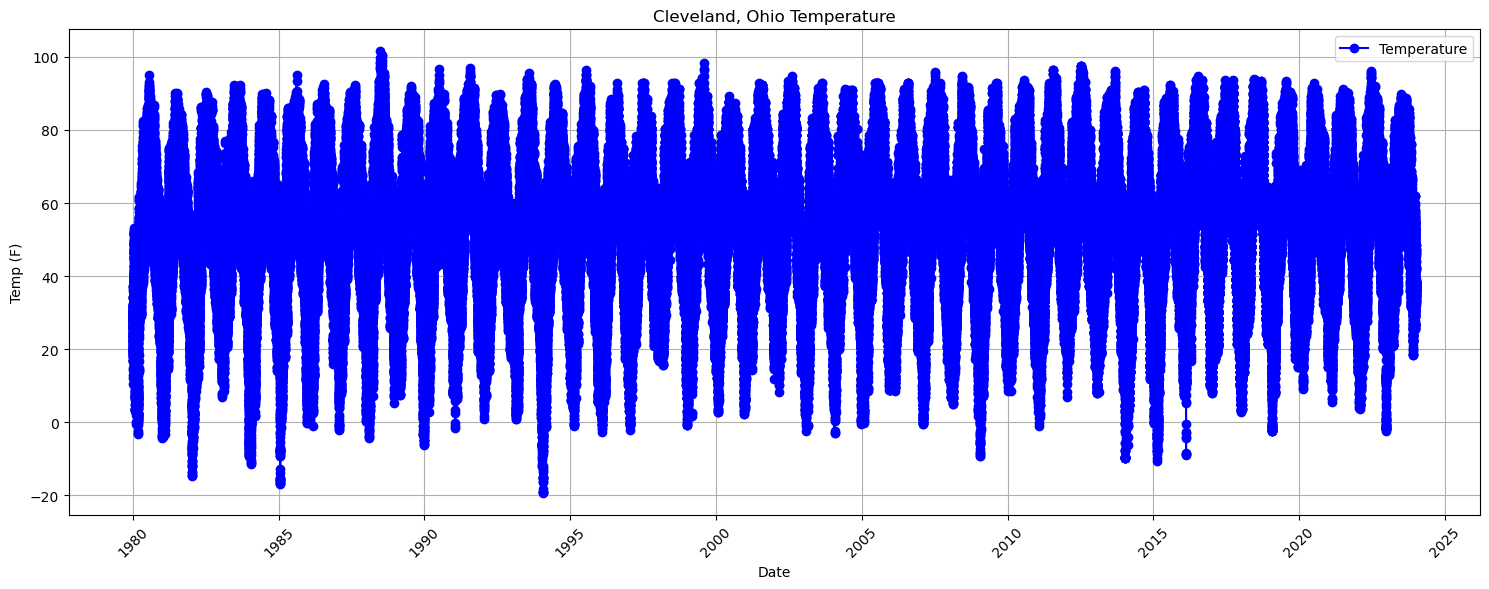

In [9]:
# plot the hourly temperature data in Cleveland
plt.figure(figsize=(15, 6))
plt.plot(df_cleveland['temp'], marker='o', linestyle='-', color='b', label='Temperature')
plt.title('Cleveland, Ohio Temperature')
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# Read influenze file as DataFrame, with the first column as row index
df_influenza = pd.read_csv("data/ohio_influenza.csv")
# Preview the dataset tail
df_influenza.tail()

,year,week,Week Start,Week End,cuyahoga_cum,franklin_cum,hamilton_cum,cuyahoga_per_week,franklin_per_week,hamilton_per_week
185,2021,16,4/18/2021,4/24/2021,6.0,19.0,10.0,0,0,0
186,2021,17,4/25/2021,5/1/2021,6.0,19.0,10.0,0,0,0
187,2021,18,5/2/2021,5/8/2021,6.0,19.0,10.0,0,0,0
188,2021,19,5/9/2021,5/15/2021,6.0,19.0,10.0,0,0,0
189,2021,20,5/16/2021,5/22/2021,6.0,19.0,10.0,0,0,0


In [11]:
# get influenze dataframe info
df_influenza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               190 non-null    int64  
 1   week               190 non-null    int64  
 2   Week Start         190 non-null    object 
 3   Week End           190 non-null    object 
 4   cuyahoga_cum       133 non-null    float64
 5   franklin_cum       133 non-null    float64
 6   hamilton_cum       133 non-null    float64
 7   cuyahoga_per_week  190 non-null    int64  
 8   franklin_per_week  190 non-null    int64  
 9   hamilton_per_week  190 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 15.0+ KB


In [12]:
# convert Week Start to a datetime
df_influenza['Week Start'] = pd.to_datetime(df_influenza['Week Start'])


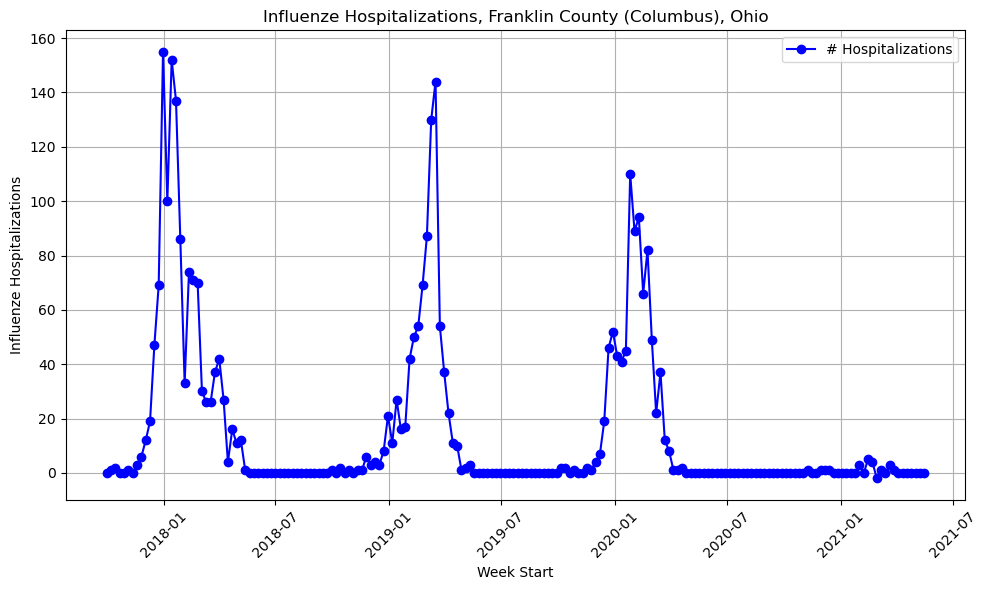

In [13]:
# plot influenze hospitaliations from Franklin county, Ohio
plt.figure(figsize=(10, 6))
plt.plot(df_influenza['Week Start'], df_influenza['franklin_per_week'], marker='o', linestyle='-', color='b', label='# Hospitalizations')
plt.xlabel('Week Start')
plt.ylabel('Influenze Hospitalizations')
plt.title('Influenze Hospitalizations, Franklin County (Columbus), Ohio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

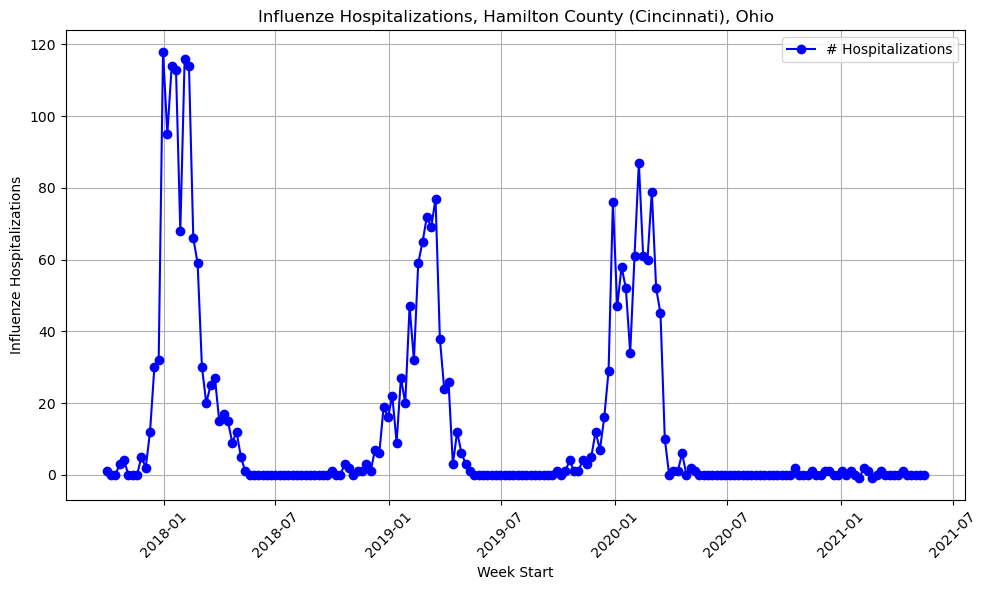

In [14]:
# plot influenze hospitaliations from Hamilton county, Ohio
plt.figure(figsize=(10, 6))
plt.plot(df_influenza['Week Start'], df_influenza['hamilton_per_week'], marker='o', linestyle='-', color='b', label='# Hospitalizations')
plt.xlabel('Week Start')
plt.ylabel('Influenze Hospitalizations')
plt.title('Influenze Hospitalizations, Hamilton County (Cincinnati), Ohio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

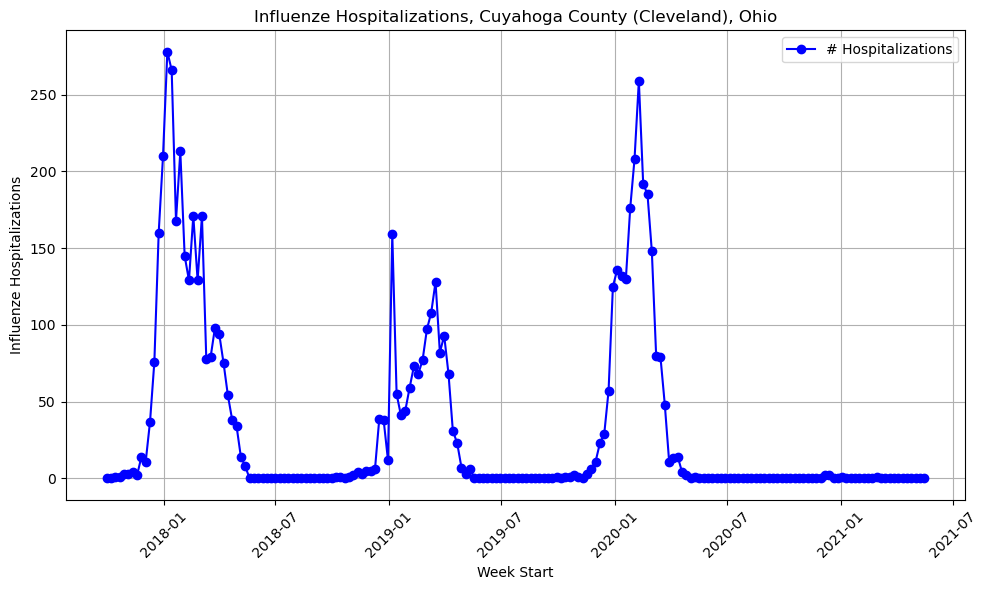

In [15]:
# plot influenze hospitaliations from Cuyahoga county, Ohio
plt.figure(figsize=(10, 6))
plt.plot(df_influenza['Week Start'], df_influenza['cuyahoga_per_week'], marker='o', linestyle='-', color='b', label='# Hospitalizations')
plt.xlabel('Week Start')
plt.ylabel('Influenze Hospitalizations')
plt.title('Influenze Hospitalizations, Cuyahoga County (Cleveland), Ohio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

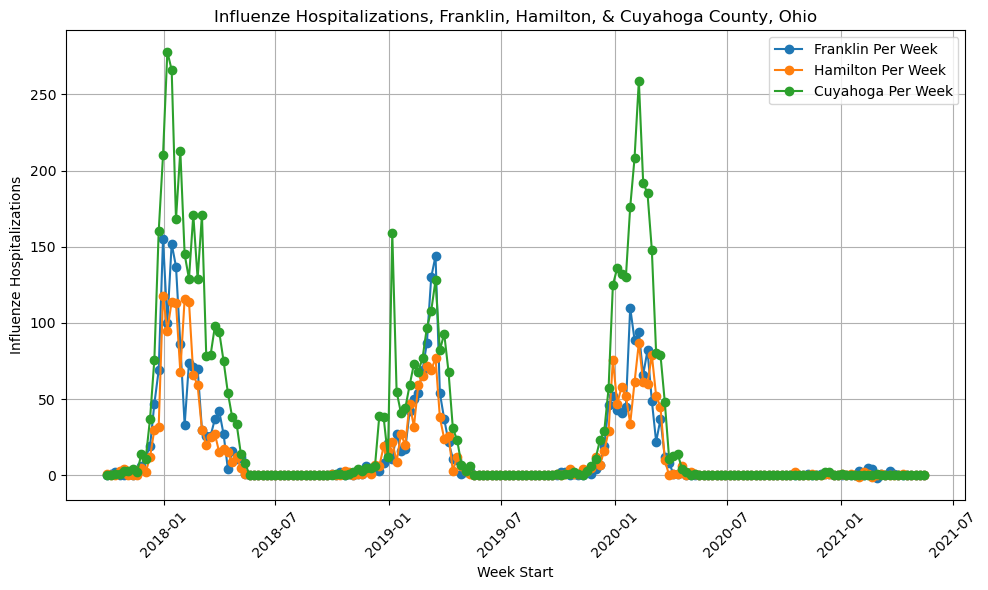

In [16]:
# plot influenze hospitaliations from Cuyahoga county, Ohio
plt.figure(figsize=(10, 6))
plt.plot(df_influenza['Week Start'], df_influenza['franklin_per_week'], marker='o', linestyle='-', label='Franklin Per Week')
plt.plot(df_influenza['Week Start'], df_influenza['hamilton_per_week'], marker='o', linestyle='-', label='Hamilton Per Week')
plt.plot(df_influenza['Week Start'], df_influenza['cuyahoga_per_week'], marker='o', linestyle='-', label='Cuyahoga Per Week')
plt.xlabel('Week Start')
plt.ylabel('Influenze Hospitalizations')
plt.title('Influenze Hospitalizations, Franklin, Hamilton, & Cuyahoga County, Ohio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Calculate the weekly average temperature
# Resample by week, calculate the mean temperature
weekly_avg_temp_columbus = df_columbus['temp'].resample('W').mean()
weekly_avg_temp_cincinnati = df_cincinatti['temp'].resample('W').mean()
weekly_avg_temp_cleveland = df_cleveland['temp'].resample('W').mean()

# Reset index
weekly_avg_temp_columbus = weekly_avg_temp_columbus.reset_index()
weekly_avg_temp_cincinnati = weekly_avg_temp_cincinnati.reset_index()
weekly_avg_temp_cleveland = weekly_avg_temp_cleveland.reset_index()

# Rename the columns
weekly_avg_temp_columbus.columns = ['Week Start', 'Average Temp']
weekly_avg_temp_cincinnati.columns = ['Week Start', 'Average Temp']
weekly_avg_temp_cleveland.columns = ['Week Start', 'Average Temp']

print(weekly_avg_temp_columbus)

                    Week Start  Average Temp
0    1980-01-06 00:00:00-05:00     28.482595
1    1980-01-13 00:00:00-05:00     30.496923
2    1980-01-20 00:00:00-05:00     38.612034
3    1980-01-27 00:00:00-05:00     27.912800
4    1980-02-03 00:00:00-05:00     16.601607
...                        ...           ...
2292 2023-12-10 00:00:00-05:00     42.378729
2293 2023-12-17 00:00:00-05:00     37.649716
2294 2023-12-24 00:00:00-05:00     39.001398
2295 2023-12-31 00:00:00-05:00     43.769175
2296 2024-01-07 00:00:00-05:00     33.660476

[2297 rows x 2 columns]


In [18]:
# change localization of Week start to match weather dataframe
weekly_avg_temp_columbus['Week Start'] = weekly_avg_temp_columbus['Week Start'].dt.tz_localize(None)
weekly_avg_temp_cincinnati['Week Start'] = weekly_avg_temp_cincinnati['Week Start'].dt.tz_localize(None)
weekly_avg_temp_cleveland['Week Start'] = weekly_avg_temp_cleveland['Week Start'].dt.tz_localize(None)

In [19]:
# show dataframe info
weekly_avg_temp_columbus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Week Start    2297 non-null   datetime64[ns]
 1   Average Temp  2297 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.0 KB


In [20]:
# look at weekly ave temp tail
weekly_avg_temp_columbus.tail()

,Week Start,Average Temp
2292,2023-12-10,42.378729
2293,2023-12-17,37.649716
2294,2023-12-24,39.001398
2295,2023-12-31,43.769175
2296,2024-01-07,33.660476


In [21]:
# look at influenza tail
df_influenza.tail()

,year,week,Week Start,Week End,cuyahoga_cum,franklin_cum,hamilton_cum,cuyahoga_per_week,franklin_per_week,hamilton_per_week
185,2021,16,2021-04-18,4/24/2021,6.0,19.0,10.0,0,0,0
186,2021,17,2021-04-25,5/1/2021,6.0,19.0,10.0,0,0,0
187,2021,18,2021-05-02,5/8/2021,6.0,19.0,10.0,0,0,0
188,2021,19,2021-05-09,5/15/2021,6.0,19.0,10.0,0,0,0
189,2021,20,2021-05-16,5/22/2021,6.0,19.0,10.0,0,0,0


In [22]:
# join the two tables into one merged dataframe on Week Start
merged_df_columbus = pd.merge(weekly_avg_temp_columbus, df_influenza, on='Week Start', how='inner')
merged_df_cincinnati = pd.merge(weekly_avg_temp_cincinnati, df_influenza, on='Week Start', how='inner')
merged_df_cleveland = pd.merge(weekly_avg_temp_cleveland, df_influenza, on='Week Start', how='inner')


In [23]:
# look at merged dataframe head
merged_df_columbus.head(10)

,Week Start,Average Temp,year,week,Week End,cuyahoga_cum,franklin_cum,hamilton_cum,cuyahoga_per_week,franklin_per_week,hamilton_per_week
0,2017-10-01,67.473929,2017,40,10/7/2017,0.0,0.0,1.0,0,0,1
1,2017-10-08,68.004358,2017,41,10/14/2017,0.0,1.0,1.0,0,1,0
2,2017-10-15,66.508407,2017,42,10/21/2017,1.0,3.0,1.0,1,2,0
3,2017-10-22,57.868690,2017,43,10/28/2017,2.0,3.0,4.0,1,0,3
4,2017-10-29,48.365587,2017,44,11/4/2017,5.0,3.0,8.0,3,0,4
5,2017-11-05,50.559529,2017,45,11/11/2017,8.0,4.0,8.0,3,1,0
6,2017-11-12,40.345198,2017,46,11/18/2017,12.0,4.0,8.0,4,0,0
7,2017-11-19,42.325414,2017,47,11/25/2017,14.0,7.0,8.0,2,3,0
8,2017-11-26,39.200000,2017,48,12/2/2017,28.0,13.0,13.0,14,6,5
9,2017-12-03,43.511775,2017,49,12/9/2017,39.0,25.0,15.0,11,12,2


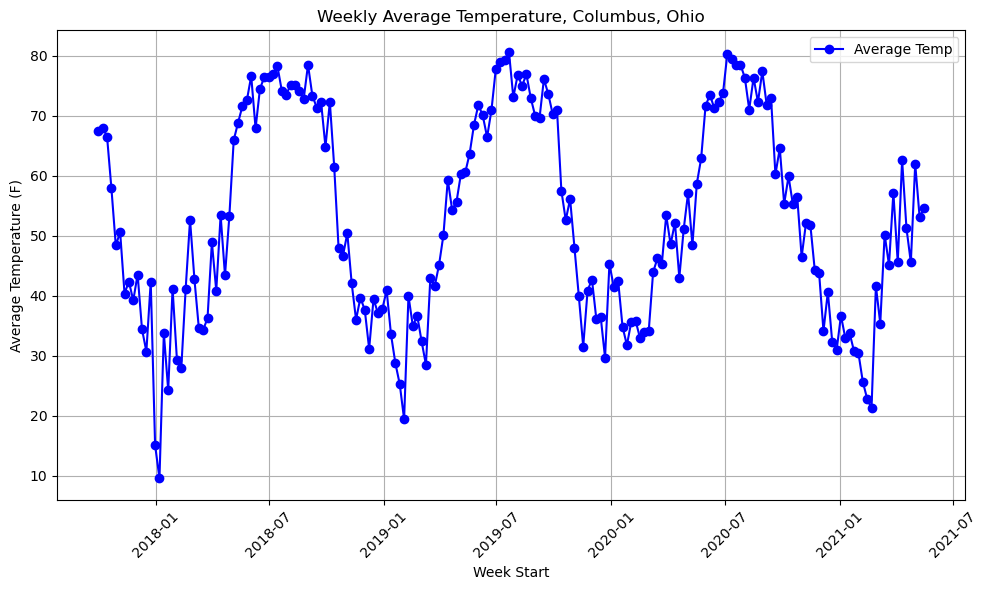

In [24]:
# Plot Average Temp by Week Start
plt.figure(figsize=(10, 6))
plt.plot(merged_df_columbus['Week Start'], merged_df_columbus['Average Temp'], marker='o', linestyle='-', color='b', label='Average Temp')
plt.xlabel('Week Start')
plt.ylabel('Average Temperature (F)')
plt.title('Weekly Average Temperature, Columbus, Ohio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

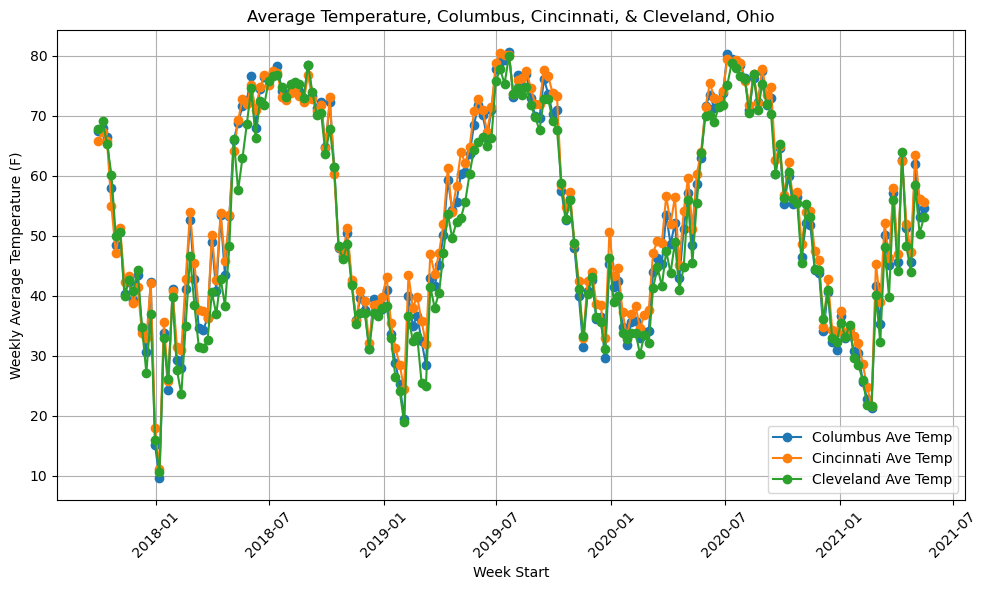

In [25]:
# Plot Average Temp by Week Start
plt.figure(figsize=(10, 6))
plt.plot(merged_df_columbus['Week Start'], merged_df_columbus['Average Temp'], marker='o', linestyle='-', label='Columbus Ave Temp')
plt.plot(merged_df_columbus['Week Start'], merged_df_cincinnati['Average Temp'], marker='o', linestyle='-', label='Cincinnati Ave Temp')
plt.plot(merged_df_columbus['Week Start'], merged_df_cleveland['Average Temp'], marker='o', linestyle='-', label='Cleveland Ave Temp')
plt.xlabel('Week Start')
plt.ylabel('Weekly Average Temperature (F)')
plt.title('Average Temperature, Columbus, Cincinnati, & Cleveland, Ohio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

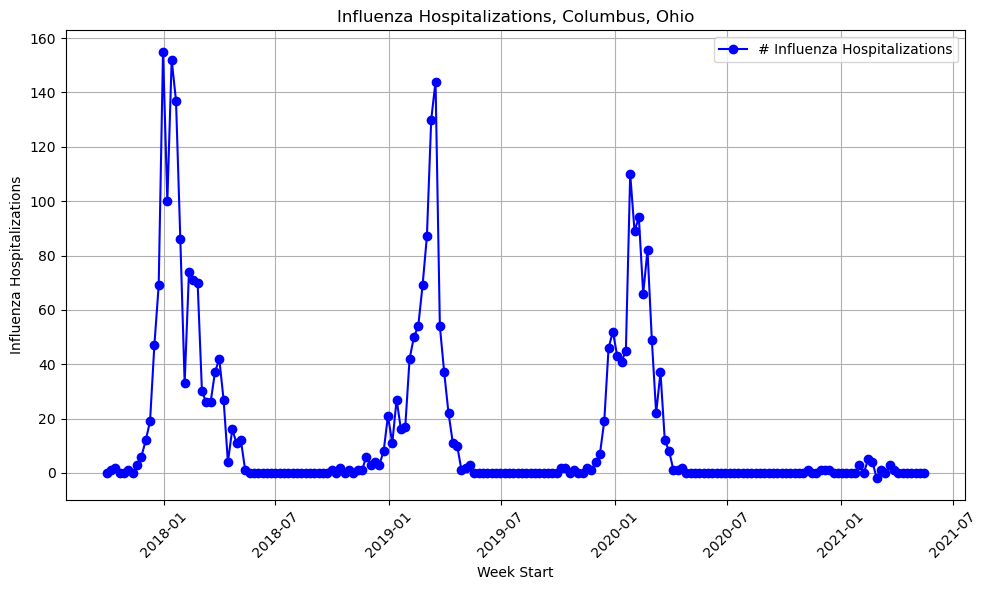

In [26]:
# Plot Week Start by franklin_per_month
plt.figure(figsize=(10, 6))
plt.plot(merged_df_columbus['Week Start'], merged_df_columbus['franklin_per_week'], marker='o', linestyle='-', color='b', label='# Influenza Hospitalizations')
plt.xlabel('Week Start')
plt.ylabel('Influenza Hospitalizations')
plt.title('Influenza Hospitalizations, Columbus, Ohio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# filter data to remove 2021.  This is when covid occured.
merged_df_filtered_columbus = merged_df_columbus[merged_df_columbus['Week Start'] < '2020-07-01']
merged_df_filtered_cincinnati = merged_df_cincinnati[merged_df_cincinnati['Week Start'] < '2020-07-01']
merged_df_filtered_cleveland = merged_df_cleveland[merged_df_cleveland['Week Start'] < '2020-07-01']

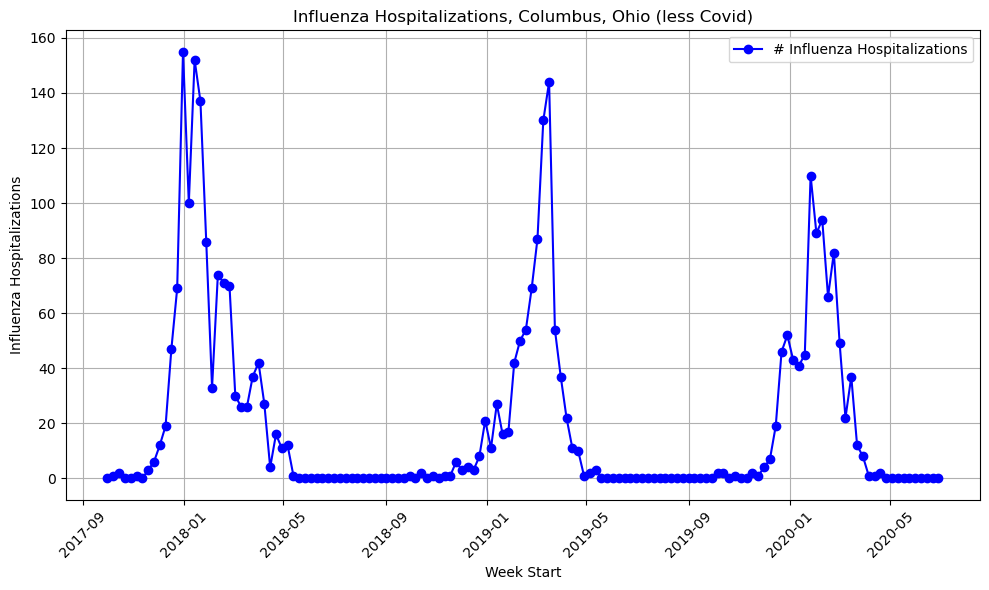

In [28]:
# Plot Week Start by franklin_per_month
plt.figure(figsize=(10, 6))
plt.plot(merged_df_filtered_columbus['Week Start'], merged_df_filtered_columbus['franklin_per_week'], marker='o', linestyle='-', color='b', label='# Influenza Hospitalizations')
plt.xlabel('Week Start')
plt.ylabel('Influenza Hospitalizations')
plt.title('Influenza Hospitalizations, Columbus, Ohio (less Covid)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

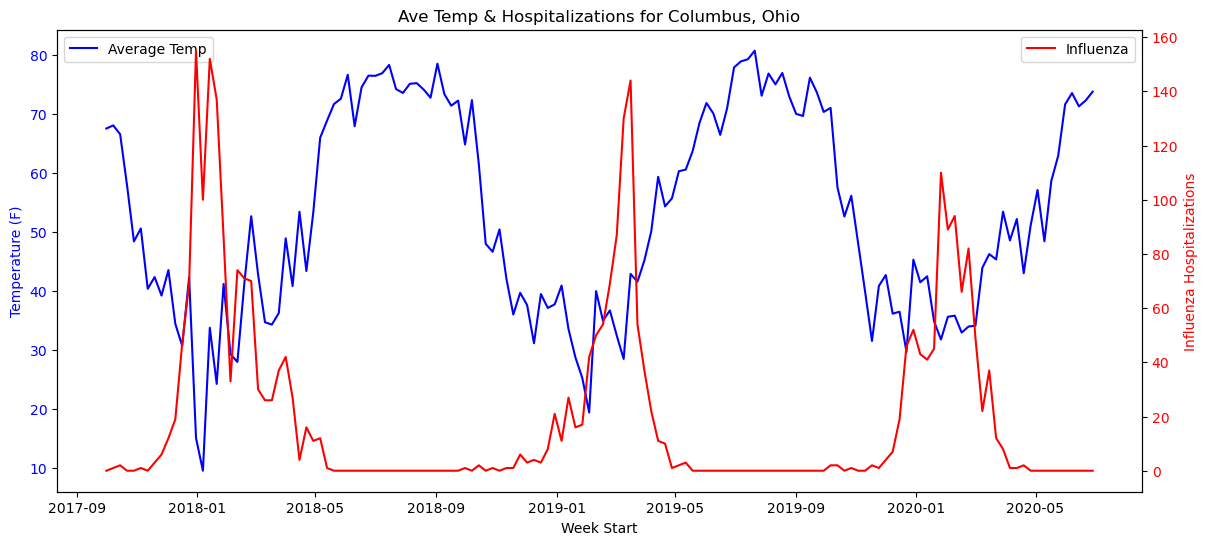

In [29]:
# create a lot with both average temp and hospitalizations
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot average temp on first y axis
ax1.plot(merged_df_filtered_columbus['Week Start'], merged_df_filtered_columbus['Average Temp'], color='b', label='Average Temp')
ax1.set_xlabel('Week Start')
ax1.set_ylabel('Temperature (F)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# plot influenza on sencond y axis
ax2 = ax1.twinx()
ax2.plot(merged_df_filtered_columbus['Week Start'], merged_df_filtered_columbus['franklin_per_week'], color='r', label='Influenza')
ax2.set_ylabel('Influenza Hospitalizations', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add a title
plt.title('Ave Temp & Hospitalizations for Columbus, Ohio')

# Show the plot
plt.show()

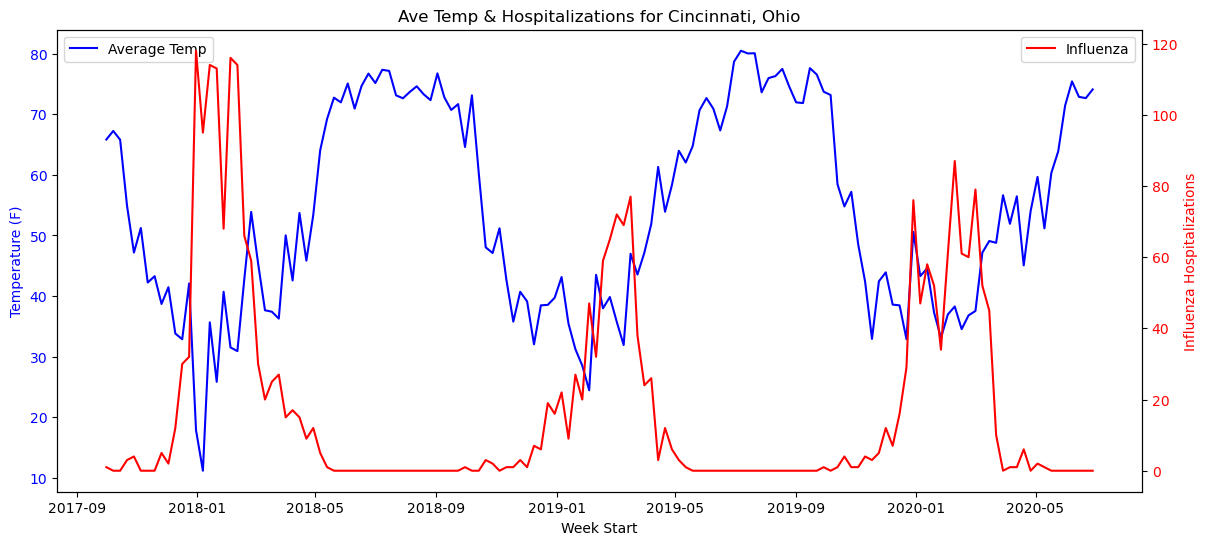

In [30]:
# create a lot with both average temp and hospitalizations
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot average temp on first y axis
ax1.plot(merged_df_filtered_cincinnati['Week Start'], merged_df_filtered_cincinnati['Average Temp'], color='b', label='Average Temp')
ax1.set_xlabel('Week Start')
ax1.set_ylabel('Temperature (F)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# plot influenza on sencond y axis
ax2 = ax1.twinx()
ax2.plot(merged_df_filtered_cincinnati['Week Start'], merged_df_filtered_cincinnati['hamilton_per_week'], color='r', label='Influenza')
ax2.set_ylabel('Influenza Hospitalizations', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add a title
plt.title('Ave Temp & Hospitalizations for Cincinnati, Ohio')

# Show the plot
plt.show()

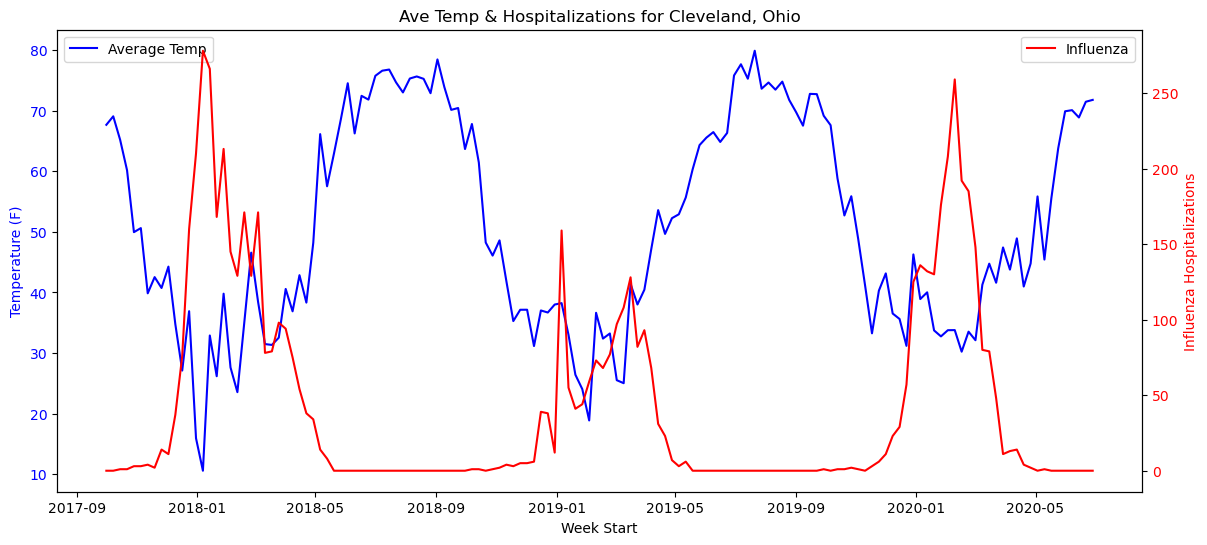

In [31]:
# create a lot with both average temp and hospitalizations for Cleveland
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot average temp on first y axis
ax1.plot(merged_df_filtered_cleveland['Week Start'], merged_df_filtered_cleveland['Average Temp'], color='b', label='Average Temp')
ax1.set_xlabel('Week Start')
ax1.set_ylabel('Temperature (F)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# plot influenza on sencond y axis
ax2 = ax1.twinx()
ax2.plot(merged_df_filtered_cleveland['Week Start'], merged_df_filtered_cleveland['cuyahoga_per_week'], color='r', label='Influenza')
ax2.set_ylabel('Influenza Hospitalizations', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add a title
plt.title('Ave Temp & Hospitalizations for Cleveland, Ohio')

# Show the plot
plt.show()

In [32]:
# calculate correlation between average temp and number of Hospitalizations (include Covid)
columbus_corr = merged_df_columbus['Average Temp'].corr(merged_df_columbus['franklin_per_week'])
cincinnati_corr = merged_df_cincinnati['Average Temp'].corr(merged_df_cincinnati['franklin_per_week'])
cleveland_corr = merged_df_cleveland['Average Temp'].corr(merged_df_cleveland['franklin_per_week'])

print("The correlation including Covid year")
print("Correlation for Columbus: ", columbus_corr)
print("Correlation for Cincinnati: ", cincinnati_corr)
print("Correlation for Cleveland: ", cleveland_corr)

The correlation including Covid year
Correlation for Columbus:  -0.5203833039938958
Correlation for Cincinnati:  -0.5131438548428843
Correlation for Cleveland:  -0.5339808746288773


In [33]:
# calculate correlation between average temp and number of Hospitalizations (exclude Covid)
columbus_corr_less_covid = merged_df_filtered_columbus['Average Temp'].corr(merged_df_filtered_columbus['franklin_per_week'])
cincinnati_corr_less_covid = merged_df_filtered_cincinnati['Average Temp'].corr(merged_df_filtered_cincinnati['franklin_per_week'])
cleveland_corr_less_covid = merged_df_filtered_cleveland['Average Temp'].corr(merged_df_filtered_cleveland['franklin_per_week'])

print("The correlation excluding Covid year")
print("Correlation for Columbus: ", columbus_corr_less_covid)
print("Correlation for Cincinnati: ", cincinnati_corr_less_covid)
print("Correlation for Cleveland: ", cleveland_corr_less_covid)

The correlation excluding Covid year
Correlation for Columbus:  -0.6212719280690315
Correlation for Cincinnati:  -0.612501938435123
Correlation for Cleveland:  -0.6251223823684846


Influenza season date ranges
2017-2018 Season: week 10/1/2017 to week 5/13/2018
2018-2019 Season: week 9/30/2018 to week 5/12/2019
2019-2020 Season: week 9/29/2019 to week 5/10/2020

In [34]:
df_columbus_2017_2018 = merged_df_filtered_columbus[(merged_df_filtered_columbus['Week Start'] >= '2017-10-01') & (merged_df_filtered_columbus['Week Start'] <= '2018-05-13')]
df_cincinnati_2017_2018 = merged_df_filtered_cincinnati[(merged_df_filtered_cincinnati['Week Start'] >= '2017-10-01') & (merged_df_filtered_cincinnati['Week Start'] <= '2018-05-13')]
df_cleveland_2017_2018 = merged_df_filtered_cleveland[(merged_df_filtered_cleveland['Week Start'] >= '2017-10-01') & (merged_df_filtered_cleveland['Week Start'] <= '2018-05-13')]
columbus_2017_2018 = df_columbus_2017_2018['franklin_cum'].max()
cincinnati_2017_2018 = df_cincinnati_2017_2018['hamilton_cum'].max()
cleveland_2017_2018 = df_cleveland_2017_2018['cuyahoga_cum'].max()
columbus_2017_2018_ave_temp = df_columbus_2017_2018['Average Temp'].mean()
cincinnati_2017_2018_ave_temp = df_cincinnati_2017_2018['Average Temp'].mean()
cleveland_2017_2018_ave_temp = df_cleveland_2017_2018['Average Temp'].mean()
print('Total Influenza Cases 2017-2018 Season')
print(f'Total Influenza Hospitalizations for Columbus: {columbus_2017_2018} with and average temp of {columbus_2017_2018_ave_temp}')
print(f'Total Influenza Hospitalizations for Cincinnati: {cincinnati_2017_2018} with and average temp of {cincinnati_2017_2018_ave_temp}' )
print(f'Total Influenza Hospitalizations for Cleveland: {cleveland_2017_2018} with and average temp of {cleveland_2017_2018_ave_temp}' )


Total Influenza Cases 2017-2018 Season
Total Influenza Hospitalizations for Columbus: 1270.0 with and average temp of 43.295831178524296
Total Influenza Hospitalizations for Cincinnati: 1128.0 with and average temp of 44.01446297883096
Total Influenza Hospitalizations for Cleveland: 2764.0 with and average temp of 40.94040299218452


In [35]:
df_columbus_2018_2019 = merged_df_filtered_columbus[(merged_df_filtered_columbus['Week Start'] >= '2018-09-30') & (merged_df_filtered_columbus['Week Start'] <= '2019-05-12')]
df_cincinnati_2018_2019 = merged_df_filtered_cincinnati[(merged_df_filtered_cincinnati['Week Start'] >= '2018-09-30') & (merged_df_filtered_cincinnati['Week Start'] <= '2019-05-12')]
df_cleveland_2018_2019 = merged_df_filtered_cleveland[(merged_df_filtered_cleveland['Week Start'] >= '2018-09-30') & (merged_df_filtered_cleveland['Week Start'] <= '2019-05-12')]
columbus_2018_2019 = df_columbus_2018_2019['franklin_cum'].max()
cincinnati_2018_2019 = df_cincinnati_2018_2019['hamilton_cum'].max()
cleveland_2018_2019 = df_cleveland_2018_2019['cuyahoga_cum'].max()
columbus_2018_2019_ave_temp = df_columbus_2018_2019['Average Temp'].mean()
cincinnati_2018_2019_ave_temp = df_cincinnati_2018_2019['Average Temp'].mean()
cleveland_2018_2019_ave_temp = df_cleveland_2018_2019['Average Temp'].mean()
print('Total Influenza Cases 2018-2019 Season')
print(f'Total Influenza Hospitalizations for Columbus: {columbus_2018_2019} with and average temp of {columbus_2018_2019_ave_temp}')
print(f'Total Influenza Hospitalizations for Cincinnati: {cincinnati_2018_2019} with and average temp of {cincinnati_2018_2019_ave_temp}' )
print(f'Total Influenza Hospitalizations for Cleveland: {cleveland_2018_2019} with and average temp of {cleveland_2018_2019_ave_temp}' )

Total Influenza Cases 2018-2019 Season
Total Influenza Hospitalizations for Columbus: 838.0 with and average temp of 43.45435898669816
Total Influenza Hospitalizations for Cincinnati: 672.0 with and average temp of 45.21636545551355
Total Influenza Hospitalizations for Cleveland: 1339.0 with and average temp of 41.042370128888514


In [36]:
df_columbus_2019_2020 = merged_df_filtered_columbus[(merged_df_filtered_columbus['Week Start'] >= '2019-09-29') & (merged_df_filtered_columbus['Week Start'] <= '2020-05-10')]
df_cincinnati_2019_2020 = merged_df_filtered_cincinnati[(merged_df_filtered_cincinnati['Week Start'] >= '2019-09-29') & (merged_df_filtered_cincinnati['Week Start'] <= '2020-05-10')]
df_cleveland_2019_2020 = merged_df_filtered_cleveland[(merged_df_filtered_cleveland['Week Start'] >= '2019-09-29') & (merged_df_filtered_cleveland['Week Start'] <= '2020-05-10')]
columbus_2019_2020 = df_columbus_2019_2020['franklin_cum'].max()
cincinnati_2019_2020 = df_cincinnati_2019_2020['hamilton_cum'].max()
cleveland_2019_2020 = df_cleveland_2019_2020['cuyahoga_cum'].max()
columbus_2019_2020_ave_temp = df_columbus_2019_2020['Average Temp'].mean()
cincinnati_2019_2020_ave_temp = df_cincinnati_2019_2020['Average Temp'].mean()
cleveland_2019_2020_ave_temp = df_cleveland_2019_2020['Average Temp'].mean()
print('Total Influenza Cases 2019-2020 Season')
print(f'Total Influenza Hospitalizations for Columbus: {columbus_2019_2020} with and average temp of {columbus_2019_2020_ave_temp}')
print(f'Total Influenza Hospitalizations for Cincinnati: {cincinnati_2019_2020} with and average temp of {cincinnati_2019_2020_ave_temp}' )
print(f'Total Influenza Hospitalizations for Cleveland: {cleveland_2019_2020} with and average temp of {cleveland_2019_2020_ave_temp}' )

Total Influenza Cases 2019-2020 Season
Total Influenza Hospitalizations for Columbus: 838.0 with and average temp of 44.534663332286506
Total Influenza Hospitalizations for Cincinnati: 817.0 with and average temp of 46.982702146848986
Total Influenza Hospitalizations for Cleveland: 2078.0 with and average temp of 43.1497076144231


In [37]:
columbus_temps = [columbus_2017_2018_ave_temp,columbus_2018_2019_ave_temp,columbus_2019_2020_ave_temp]
cincinnati_temps = [cincinnati_2017_2018_ave_temp,cincinnati_2018_2019_ave_temp,cincinnati_2019_2020_ave_temp]
cleveland_temps = [cleveland_2017_2018_ave_temp,cleveland_2018_2019_ave_temp,cleveland_2019_2020_ave_temp]
columbus_influenza = [columbus_2017_2018,columbus_2018_2019,columbus_2019_2020]
cincinnati_influenza = [cincinnati_2017_2018,cincinnati_2018_2019,cincinnati_2019_2020]
cleveland_influenza = [cleveland_2017_2018,cleveland_2018_2019,cleveland_2019_2020]

In [38]:
df_condensed = pd.DataFrame({'columbus_influenza':columbus_influenza,'cincinnati_influenza':cincinnati_influenza,'cleveland_influenza':cleveland_influenza,
                             'columbus_temps':columbus_temps,'cincinnati_temps':cincinnati_temps,'cleveland_temps':cleveland_temps})

C:\Users\saund\AppData\Local\Temp\ipykernel_30228\1155414482.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(custom_labels)


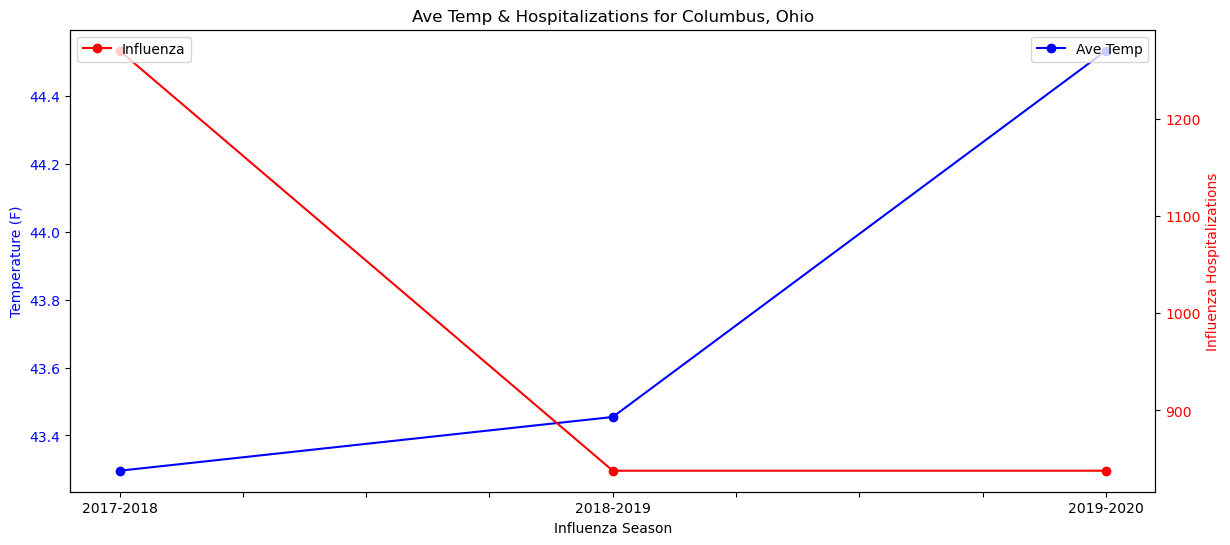

In [39]:
# create a lot with both average temp and hospitalizations for Columbus
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot average temp on first y axis
ax1.plot(df_condensed['columbus_temps'], color='b', marker='o',label='Ave Temp')
ax1.set_xlabel('Influenza Season')
ax1.set_ylabel('Temperature (F)', color='b')
ax1.tick_params(axis='y', labelcolor='b')


# plot influenza on sencond y axis
ax2 = ax1.twinx()
ax2.plot(df_condensed['columbus_influenza'], color='r', marker='o',  label='Influenza')
ax2.set_ylabel('Influenza Hospitalizations', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')

# Set custom x-axis labels
custom_labels = ["",'2017-2018', "","","",'2018-2019', "","","",'2019-2020']
ax1.set_xticklabels(custom_labels)

# Add a title
plt.title('Ave Temp & Hospitalizations for Columbus, Ohio')

# Show the plot
plt.show()

C:\Users\saund\AppData\Local\Temp\ipykernel_30228\1825050972.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(custom_labels)


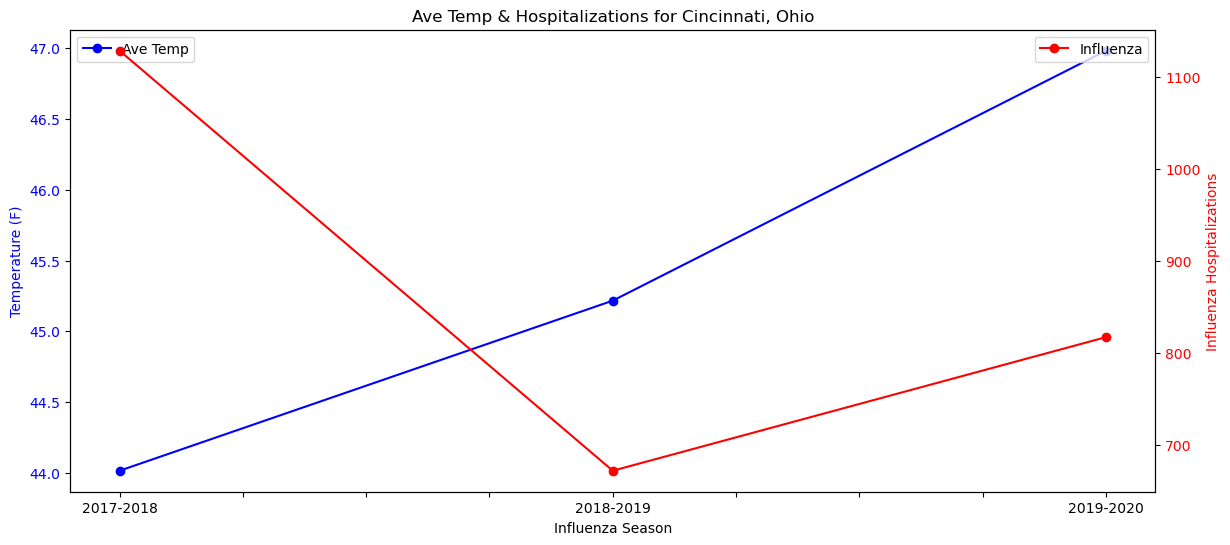

In [40]:
# create a lot with both average temp and hospitalizations for Cincinnati
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot influenza on first y axis
ax1.plot(df_condensed['cincinnati_temps'], color='b', marker='o', label='Ave Temp')
ax1.set_xlabel('Influenza Season')
ax1.set_ylabel('Temperature (F)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# plot temperature on sencond y axis
ax2 = ax1.twinx()
ax2.plot(df_condensed['cincinnati_influenza'], color='r', marker='o', label='Influenza')
ax2.set_ylabel('Influenza Hospitalizations', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set custom x-axis labels
custom_labels = ["",'2017-2018', "","","",'2018-2019', "","","",'2019-2020']
ax1.set_xticklabels(custom_labels)

# Add a title
plt.title('Ave Temp & Hospitalizations for Cincinnati, Ohio')

# Show the plot
plt.show()

C:\Users\saund\AppData\Local\Temp\ipykernel_30228\2164329326.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(custom_labels)


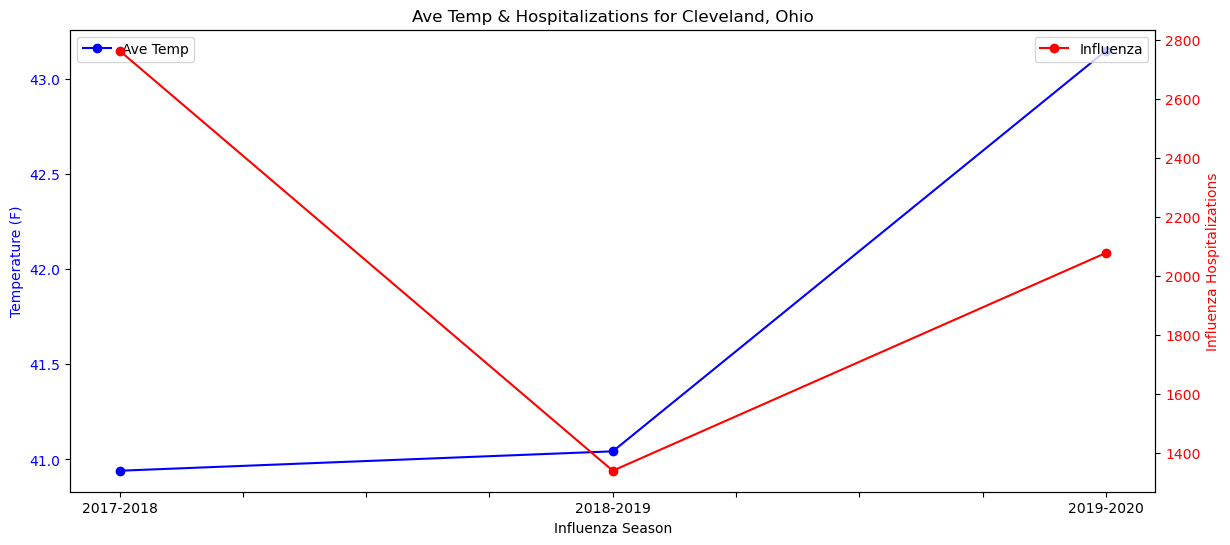

In [41]:
# create a lot with both average temp and hospitalizations for Cleveland
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot invluenza temp on first y axis
ax1.plot(df_condensed['cleveland_temps'], color='b', marker='o', label='Ave Temp')
ax1.set_xlabel('Influenza Season')
ax1.set_ylabel('Temperature (F)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# plot temperature on sencond y axis
ax2 = ax1.twinx()
ax2.plot(df_condensed['cleveland_influenza'], color='r', marker='o', label='Influenza')
ax2.set_ylabel('Influenza Hospitalizations', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set custom x-axis labels
custom_labels = ["",'2017-2018', "","","",'2018-2019', "","","",'2019-2020']
ax1.set_xticklabels(custom_labels)

# Add a title
plt.title('Ave Temp & Hospitalizations for Cleveland, Ohio')

# Show the plot
plt.show()

In [46]:
#correlation for columbus temps & influenza
df_condensed['columbus_temps'].corr(df_condensed['columbus_influenza'])

-0.5983553758591351

In [47]:
#correlation for cincinnati temps & influenza
df_condensed['cincinnati_temps'].corr(df_condensed['cincinnati_influenza'])

-0.5821817485716265

In [48]:
#correlation for Cleveland temps & influenza
df_condensed['cleveland_temps'].corr(df_condensed['cleveland_influenza'])

-0.019420163480382006